In [ ]:
#import all the libraries
from sklearn import metrics, datasets, model_selection, svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = datasets.load_iris()

x = data.data
y = data.target

ratio = 0.3

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=ratio,random_state=4)

model = svm.SVC(kernel="linear", gamma="scale", C=2)
model = model.fit(xtrain,ytrain)

ypred = model.predict(xtest)

report = metrics.classification_report(ypred,ytest)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.90      1.00      0.95         9
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn import metrics, datasets, model_selection, svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/diabetes.csv")
print(data.shape)

x = data.drop("Outcome", axis=1, inplace=False)

y = data["Outcome"]

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)
dibts_model = svm.SVC(kernel="poly", gamma="scale",C=2)
dibts_model = dibts_model.fit(xtrain,ytrain)
ypred = dibts_model.predict(xtest)

report = metrics.classification_report(ypred,ytest)
print(report)

(768, 9)
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       173
           1       0.59      0.81      0.69        58

    accuracy                           0.81       231
   macro avg       0.76      0.81      0.78       231
weighted avg       0.84      0.81      0.82       231



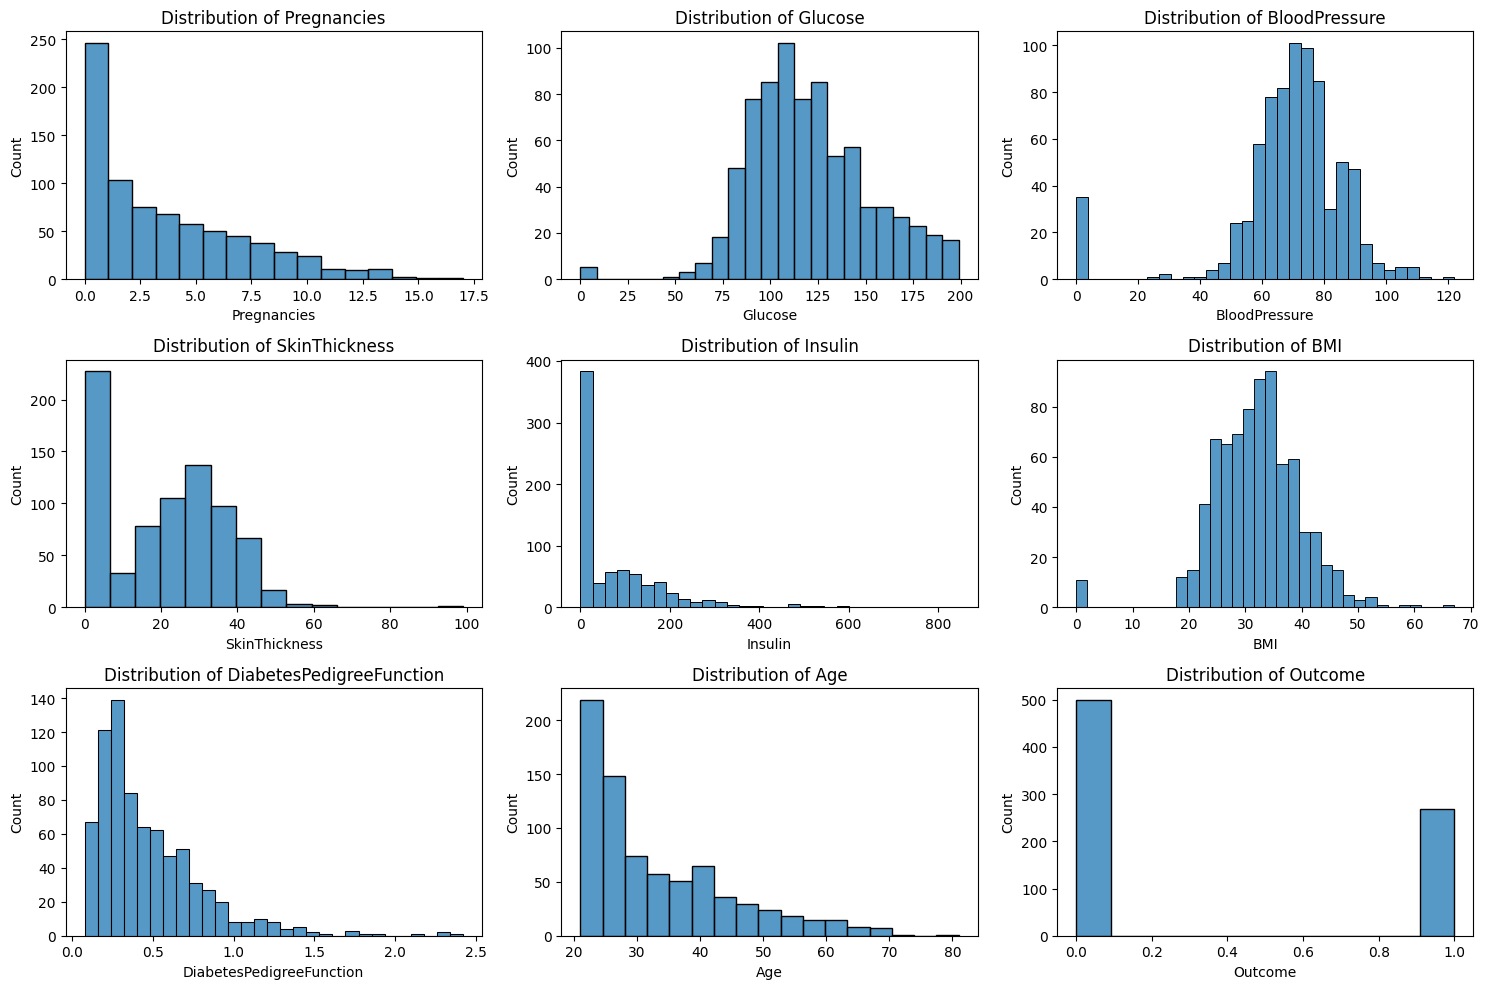

In [ ]:
import seaborn as sns
i = 1
for col in data.columns:
  plt.figure(1,(15,10))
  plt.subplot(3,3,i)
  sns.histplot(data[col])
  plt.title(f"Distribution of {col}")
  i+=1
plt.tight_layout()
plt.show()

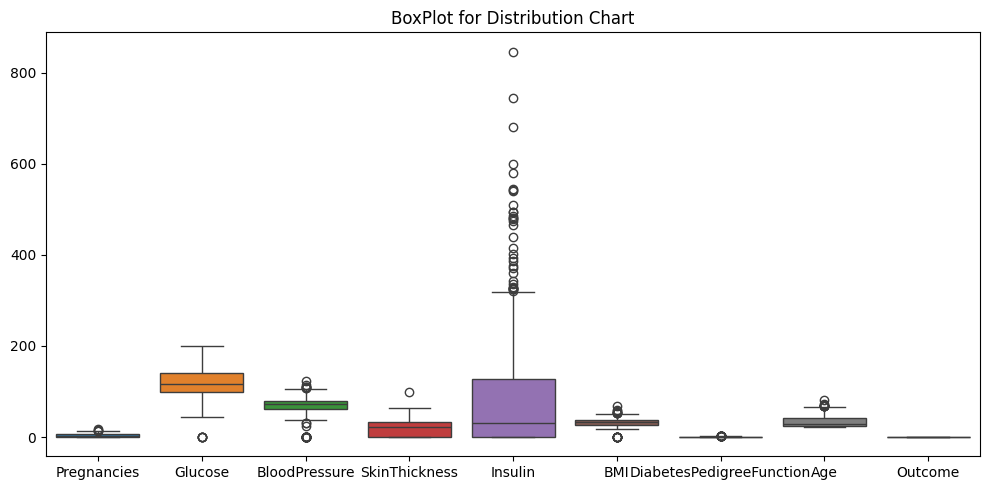

In [ ]:
plt.figure(2,figsize=(10,5));
plt.title("BoxPlot for Distribution Chart");
sns.boxplot(data=data);
plt.tight_layout()
plt.show();

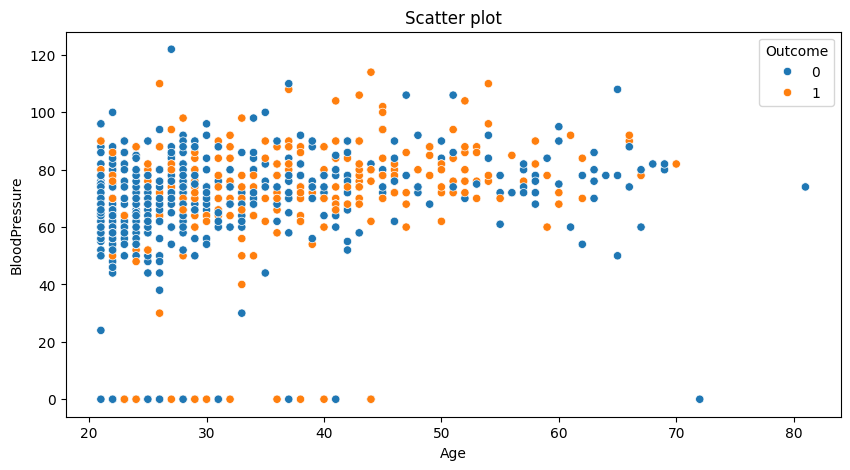

In [ ]:
plt.figure(3,(10,5))
plt.title("Scatter plot")
sns.scatterplot(data=data,x='Age',y='BloodPressure',hue='Outcome')
plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age_Category  
0                     0.627   50        1    MatureAge  
1                     0.351   31        0    MiddleAge  
2                     0.672   32        1    MiddleAge  
3                     0.167   21        0        Young  
4                     2.288   33        1    MiddleAge  


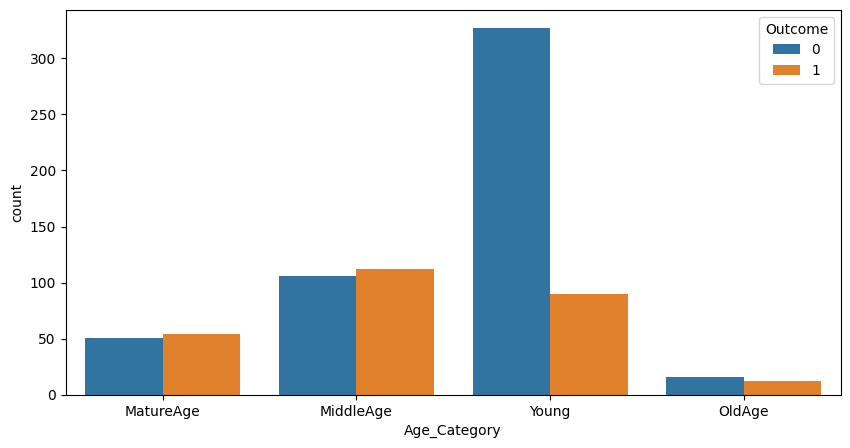

In [ ]:
import pandas as pd
def age_category(age):
  if(age<=30):
    return 'Young';
  elif(age>=31 and age<=44):
    return 'MiddleAge';
  elif(age>=46 and age<=65):
    return 'MatureAge';
  else:
    return 'OldAge';

Age=data['Age'];
data['Age_Category']=data['Age'].apply(age_category);
print(data.head());

#plotting graph
plt.figure(4,figsize=(10,5));
sns.countplot(data=data,x='Age_Category',hue='Outcome')
plt.show()






(768, 9)
         poly       rbf    linear
C=1  0.800866  0.822511  0.813853
C=2  0.800866  0.822511  0.813853
C=3  0.800866  0.822511  0.813853


<Axes: >

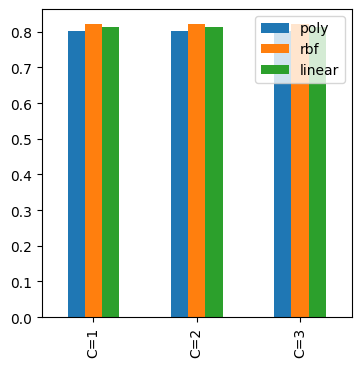

In [67]:
from sklearn import metrics, datasets, model_selection, svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/diabetes.csv")
print(data.shape)

x = data.drop("Outcome", axis=1, inplace=False)
y = data["Outcome"]

result = np.zeros((len(kernel),len(Cvalue)))

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)
kernel = ["poly", "rbf", "linear"]
Cvalue = [1,2,3]
for i in range(len(kernel)):
  for j in range(len(Cvalue)):
    dibts_model = svm.SVC(kernel=kernel[i], gamma="scale",C=Cvalue[i])
    dibts_model = dibts_model.fit(xtrain,ytrain)
    ypred = dibts_model.predict(xtest)

    acc = metrics.accuracy_score(ypred,ytest)
    result[i,j]=acc

ResultDF = pd.DataFrame(result,index=kernel,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)
ResultDF.plot(kind='bar',figsize=(4,4))



In [70]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/Fish.csv")
data.head()
data.tail

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [71]:
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

(159, 7)
         poly       rbf    linear
C=1  0.354167  0.645833  0.958333
C=2  0.354167  0.645833  0.958333
C=3  0.354167  0.645833  0.958333


<Axes: >

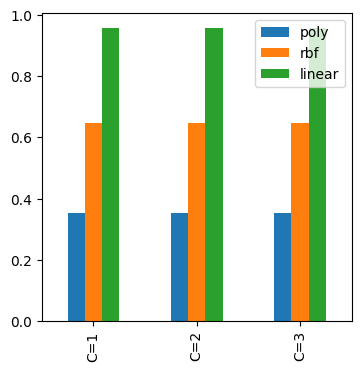

In [72]:
from sklearn import metrics, datasets, model_selection, svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(data.shape)
data = pd.read_csv("/content/Fish.csv")
x = data.drop("Species", axis=1, inplace=False)
y = data["Species"]

result = np.zeros((len(kernel),len(Cvalue)))

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)
kernel = ["poly", "rbf", "linear"]
Cvalue = [1,2,3]
for i in range(len(kernel)):
  for j in range(len(Cvalue)):
    dibts_model = svm.SVC(kernel=kernel[i], gamma="scale",C=Cvalue[i])
    dibts_model = dibts_model.fit(xtrain,ytrain)
    ypred = dibts_model.predict(xtest)

    acc = metrics.accuracy_score(ypred,ytest)
    result[i,j]=acc

ResultDF = pd.DataFrame(result,index=kernel,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)
ResultDF.plot(kind='bar',figsize=(4,4))

[]

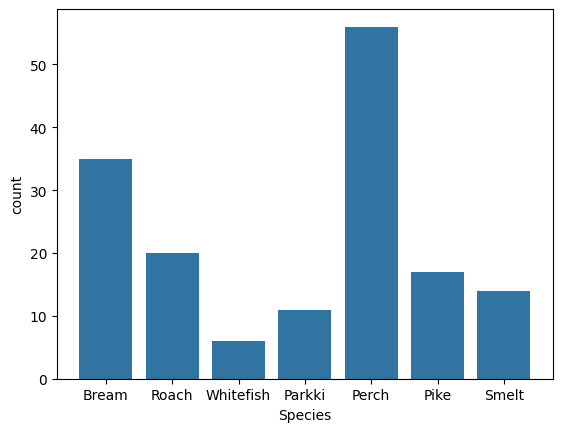

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
sns.countplot(data=data,x='Species')
plt.plot()


([<matplotlib.patches.Wedge at 0x7ef09127c040>,
 [Text(0.4925997893879059, 0.9835372120540183, 'Bream'),
  Text(-1.0692251924802005, 0.25837470419078984, 'Roach'),
  Text(-0.7263011784050116, -0.8261274709434928, 'Whitefish'),
  Text(0.010866933463401687, -1.0999463213071363, 'Parkki'),
  Text(0.6412773934759526, -0.8937355898791814, 'Perch'),
  Text(0.9883556249116893, -0.4828593570652063, 'Pike'),
  Text(1.092279199294596, -0.1301005410763399, 'Smelt')])

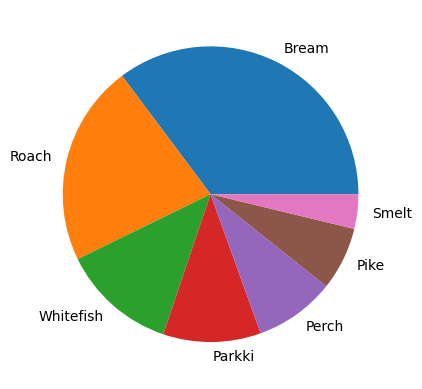

In [75]:
plt.figure(2)
SpeciesCount = data['Species'].value_counts()
label = data['Species'].unique()
plt.pie(x=SpeciesCount,labels=label)